In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
## We will use machine learning via Sklean to perform linear regression analysis.
## First, we'll import our cleaned, unsplit data for this demonstration. 
austin = 'https://raw.githubusercontent.com/dianahandler/Final_Module20_Group3/main/Data_Clearning_nochangecity/autinHousingData_cleaned_nochangecity.csv'
df = pd.read_csv(austin)

In [3]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,zip_rank,median_zip,pr_sqft
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,1,...,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,8,289500.0,117.0
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,1,...,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,8,289500.0,167.0
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,1,...,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,8,289500.0,173.0
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,1,...,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,8,289500.0,143.0
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,1,...,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,8,289500.0,113.0


## Pearson correlation coefficient analysis

As the above dataframes show, there are more than 40 features to consider in predicting property prices. With correlation analysis, as mentioned in 15.7.1 (2021), we can generate Pearson correlation coefficients to better determine numerically how each feature is related to those prices. To do this with dataframe columns, we will need corr(), which happens to generate Pearson correlation coefficients by default ('pandas.DataFrame.corr', 2021).

Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

We should also note that this correlation analysis has been conducted elsewhere in the group repository, but only as a demonstration. We will be recreating this process here since it is key for our later regression analysis.

Source: https://github.com/dianahandler/Final_Module20_Group3/commit/7c2f33ca7364dfbb40c21b7be7651fa2b5ad51de?branch=7c2f33ca7364dfbb40c21b7be7651fa2b5ad51de#diff-1c8bade9d6a619027f877dbf242cf157c76dbcd45194479d71bc5e565ffa1a09

In [4]:
## Let's look at the column names for future reference.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12933 entries, 0 to 12932
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zpid                      12933 non-null  int64  
 1   city                      12933 non-null  object 
 2   streetAddress             12933 non-null  object 
 3   zipcode                   12933 non-null  int64  
 4   description               12933 non-null  object 
 5   latitude                  12933 non-null  float64
 6   longitude                 12933 non-null  float64
 7   propertyTaxRate           12933 non-null  float64
 8   garageSpaces              12933 non-null  int64  
 9   hasAssociation            12933 non-null  int64  
 10  hasCooling                12933 non-null  int64  
 11  hasGarage                 12933 non-null  int64  
 12  hasHeating                12933 non-null  int64  
 13  hasSpa                    12933 non-null  int64  
 14  hasVie

In [5]:
df['latestPriceSource'].head(10)

0    Coldwell Banker United, Realtors - South Austin
1                                     Agent Provided
2                                     Agent Provided
3                                     Agent Provided
4                                     Agent Provided
5                                    Broker Provided
6                                    Broker Provided
7                                     Agent Provided
8                                     Agent Provided
9                                     Agent Provided
Name: latestPriceSource, dtype: object

"""While most of the data is numerical, we do find 7 columns of non-numerical data: city, streetAddress, description, hometype, latest saledate, latestPriceSource, and homeImage. 

We will certainly convert city names and hometypes, since we want to know the impact of home type or city location on price values. 

Price source also might be a factor, considering that perhaps more established and reputable price providers may charge slightly more than other providers. 

While the looks of a house may influence pricing (i.e. how subjectively good it looks), we definitely feel that home image url's aren't good indicators of price to a machine, unless our machine can read those url's and judge the quality of thousands of homes based on their respective images. Especially with the scope of our project, where we feed numerical data into a machine learning model to arrive at some output.

While we don't have a solid reason to consider latest sale date, street address, and house description as a factors for pricing, we don't have any reason to reject them either."""

Edit this later

In [6]:
## From 17.6.2 (2021), we can use sklearn's LabelEncoder to convert strings into numbered data for our
## machine learning model to interpret easier.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
## We'll store our encoded results in a new dataframe 'df1'
df1 = df.copy()
## We'll encode now.
df1['city'] = le.fit_transform(df1['city'])
df1['streetAddress'] = le.fit_transform(df1['streetAddress'])
df1['homeType'] = le.fit_transform(df1['homeType'])
df1['latestPriceSource'] = le.fit_transform(df1['latestPriceSource'])
df1['description'] = le.fit_transform(df1['description'])
## We want to account for all factors in our correlation analysis, so we'll encode the below features as well.
df1['latest_saledate'] = le.fit_transform(df1['latest_saledate'])
df1['homeImage'] = le.fit_transform(df1['homeImage'])

In [7]:
df1.dtypes

zpid                          int64
city                          int64
streetAddress                 int64
zipcode                       int64
description                   int64
latitude                    float64
longitude                   float64
propertyTaxRate             float64
garageSpaces                  int64
hasAssociation                int64
hasCooling                    int64
hasGarage                     int64
hasHeating                    int64
hasSpa                        int64
hasView                       int64
homeType                      int64
parkingSpaces                 int64
yearBuilt                     int64
latestPrice                 float64
numPriceChanges               int64
latest_saledate               int64
latest_salemonth              int64
latest_saleyear               int64
latestPriceSource             int64
numOfPhotos                   int64
accessibility                 int64
numOfAppliances               int64
numOfParkingFeatures        

In [8]:
## Previously, we used "corr" to get unformatted correlation data. While we were able to get by with "corr",
## we'll need this data formatted as a dataframe for later. We'll need "corr()" for this.
results = df1.corr()
results.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,zip_rank,median_zip,pr_sqft
zpid,1.000000,0.031987,-0.007970,-0.047785,0.002812,-0.057032,0.008735,-0.013535,0.008074,0.112186,...,-0.048822,-0.032713,-0.072430,0.070631,-0.053663,0.010098,-0.241262,-0.035729,-0.028472,0.030218
city,0.031987,1.000000,-0.066672,-0.387435,0.006964,0.017842,0.124554,-0.022453,-0.011973,0.073825,...,-0.100335,0.019242,-0.058607,-0.012081,0.007664,-0.005043,-0.022847,-0.106577,-0.089622,-0.068861
streetAddress,-0.007970,-0.066672,1.000000,0.132653,0.056677,-0.156198,-0.057933,-0.058630,0.004207,-0.063764,...,-0.053974,0.010220,0.045684,-0.049928,-0.039676,-0.031843,-0.013766,-0.017511,-0.027292,0.015039
zipcode,-0.047785,-0.387435,0.132653,1.000000,0.007363,-0.053205,-0.148400,-0.184476,-0.020048,-0.006011,...,0.052045,0.132142,0.109812,-0.056338,0.035178,-0.053862,0.076175,-0.255029,-0.300818,-0.259058
description,0.002812,0.006964,0.056677,0.007363,1.000000,0.003913,0.008414,-0.014119,0.076419,-0.006297,...,0.002081,0.019179,0.000146,0.009101,0.002624,0.018009,-0.009954,0.011301,0.013898,-0.004971


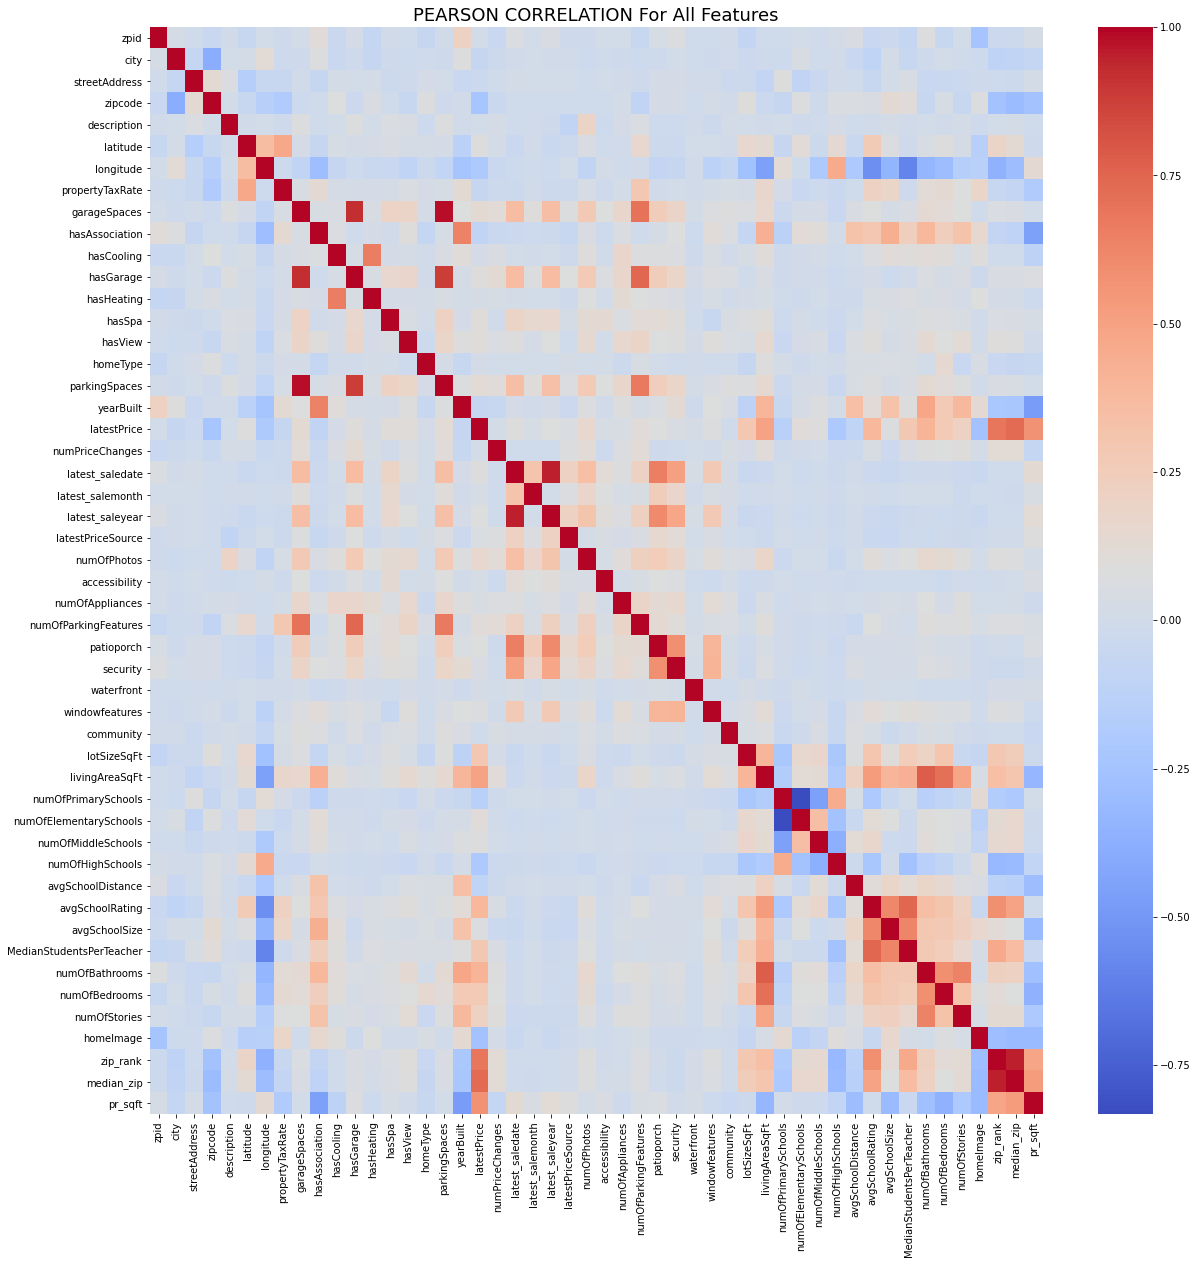

In [9]:
## Sam: With all our features encoded into numbers, we can visualize the correlation matrix, as Cynthia has
## done below.
## Import seaborn for heatmap.
import seaborn as sns

## Create a heat map for latest Price correlations to other features only.
## Sam: Since we already stored "df1.corr()" into the "results" variable, we'll edit "df1.corr" to "results".
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(results, cmap="coolwarm")

## Create title.
plt.title('PEARSON CORRELATION For All Features', fontsize=18)

plt.show()

In [10]:
## In order to measure collinearity among our features, we'll calculate VIF for each feature,
## with the help of the patsy and statsmodels libraries (2020, 'How to Calculate VIF in Python').
## https://www.statology.org/how-to-calculate-vif-in-python/
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('latestPrice ~ zpid+city+streetAddress+zipcode+description+latitude+longitude+propertyTaxRate+garageSpaces+hasAssociation+hasCooling+hasGarage+hasHeating+hasSpa+hasView+homeType+parkingSpaces+yearBuilt+numPriceChanges+latest_saledate+latest_salemonth+latest_saleyear+latestPriceSource+numOfPhotos+accessibility+numOfAppliances+numOfParkingFeatures+patioporch+security+waterfront+windowfeatures+community+lotSizeSqFt+livingAreaSqFt+numOfPrimarySchools+numOfElementarySchools+numOfMiddleSchools+numOfHighSchools+avgSchoolDistance+avgSchoolRating+avgSchoolSize+MedianStudentsPerTeacher+numOfBathrooms+numOfBedrooms+numOfStories+homeImage+zip_rank+median_zip+pr_sqft', data=df1, return_type='dataframe')
## Notice that we separated our output 'latestPrice' from the remaining 40+ features.
## We also set 'df1' as our main source for VIF calculation.

In [11]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [12]:
vif.columns

Index(['VIF', 'variable'], dtype='object')

In [13]:
vif.sort_values(by=['VIF'])

,VIF,variable
0,0.000000,Intercept
30,1.007121,waterfront
25,1.038881,accessibility
32,1.043313,community
5,1.072967,description
23,1.081586,latestPriceSource
3,1.091315,streetAddress
15,1.102851,hasView
26,1.128888,numOfAppliances
16,1.129351,homeType


With reference to 15.7.1 (2021), we'll pay particular attention to coefficients with magnitudes of at least 0.5, which indicate at least moderate correlation to 'latestPrice'. Preferrably, we'd want to look at magnitude 0.7 or higher coefficients for strong correlation.

By this reference, only 3 features are found to be at least moderately correlated to price: median_zip,
zip_rank, and pr_sqft. However, that's because those features are dependent on 'latestPrice' data, as seen in the below code: 
#### pr_sqft
df['pr_sqft'] = df.apply(lambda x: round( (x['latestPrice'] / x['livingAreaSqFt'] ), 0), axis=1 )

#### median_zip
df['median_zip'] = df['zipcode'].apply(lambda x: round(df.loc[df['zipcode']==x]['latestPrice'].median(), 0))

#### zip_rank
zipsorted = pd.DataFrame(df.groupby('zipcode')['latestPrice'].median().sort_values(ascending=True)
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1
df['zip_rank'] = df['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

Source: https://github.com/dianahandler/Final_Module20_Group3/blob/main/Housing_Price_Data.ipynb

Given this dependence on our output variable, we have some doubts over using these top 3 features.

Moving on from moderate correlation, we have these top 3 "weakly" correlated features: livingAreaSqFt (about 0.4968), numOfBathrooms (about 0.4121), and avgSchoolRating (about 0.3846). We also have a plethora of features with coefficient magnitudes of less than 0.3, while are considered to be "very weakly" correlated (15.7.1, 2021) to pricing. Despite this, seeing that the vast majority of pricing features fall outside of 'moderate' correlation, we cannot simpy rule them out of our in-depth analysis.

For demonstration sake, however, we will use the top 10 correlated features with respect to pricing for our machine learning predictions. In subsequent runs, we will look to input more applicable features and perhaps use other machine learning processes to produce our final predictions.

In [ ]:
## We'll prepare our demonstration input data by isolating our dataframe's top 10 correlated columns
X_demo = df1[['median_zip', 'zip_rank', 'pr_sqft', 'livingAreaSqFt', 'numOfBathrooms', 'avgSchoolRating', 'lotSizeSqFt', 
              'MedianStudentsPerTeacher', 'numOfBedrooms', 'numOfStories']]
X_demo.head()

In [ ]:
## Our output data will simply be our price data.
y_demo = df1['latestPrice']

In [ ]:
## Now we can split our demo data into training and testing data, as we've done in
## 17.3.1 (2021). 
X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(X_demo,
y_demo, random_state=1)
## Let's look at the dimensions of our training and testing data.

In [ ]:
X_train_demo.shape

In [ ]:
X_test_demo.shape

In [ ]:
y_train_demo.shape

In [ ]:
y_test_demo.shape

In [ ]:
## We see that our testing data has 3,234 samples while our training data has 9,699 samples.
## Compared to the over 12,000 entries of Austin housing data, our testing and training data
## will be easier for our linear regression model to handle.

In [ ]:
## Like we've done in 17.2.3 (2021), we'll use the training data to train our 
## Sklearn linear regression model.
model = LinearRegression()
model.fit(X_train_demo, y_train_demo)

In [ ]:
## With our model ready, we'll use it to predict prices using testing data, similar to what
## we've done in 17.3.1 (2021).
y_pred_demo = model.predict(X_test_demo) 

In [ ]:
## W
y_pred_demo

In [ ]:
y_test_demo

In [ ]:
testing = pd.DataFrame({'Prediction': y_pred_demo, 'Actual test': y_test_demo})
testing.head()

In [ ]:
y_demo.iloc[1253]

In [ ]:
## Notice that our testing output data includes indices that reference data from our original
## demo output data.

In [ ]:
## To gauge the model's predictive accuracy, we can start by calculating the deviation between 
## predicted and actual test values.
testing['Raw Error'] = (testing['Prediction'] - testing['Actual test'])
testing.head()

In [ ]:
## We are looking to measure mean squared error (MSE) as one way to gauge our regression 
## model's accuracy, as suggested here: https://stats.stackexchange.com/questions/142873/how-to-determine-the-accuracy-of-regression-which-measure-should-be-used
## A quick way to calculate MSE is with sklearn metrics, as seen here:
## https://www.pythonpool.com/mean-squared-error-python/
from sklearn.metrics import mean_squared_error
mean_squared_error(testing['Actual test'], testing['Prediction'])
print(mean_squared_error(testing['Actual test'], testing['Prediction']))

In [ ]:
## Double checking the math, by passing lists of actual and predicted values into
## the MSE metric function:
Pred_list = testing['Prediction'].to_list()
AT_list = testing['Actual test'].to_list()
mean_squared_error(AT_list, Pred_list)
print(mean_squared_error(AT_list, Pred_list))

In [ ]:
## From the MSE, we can calculate root MSE by setting the squared parameter to 'false'.
RootMSE = mean_squared_error(AT_list, Pred_list, squared=False)
print(RootMSE)

In [ ]:
## Another metric we can calculate is mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(AT_list, Pred_list)
print(MAE)

In [ ]:
## We can also plot the test data against the predicted models.
## For comparison, we'll plot a straight line with a slope of 1, such that
## the line's x and y values are the same.
## In theory, if a predicted data point equals the corresponding actual point,
## they'll lie directly on our straight line. Hence, with reference to the straight line,
## we can see for ourselves how close predicted values are to their actual values.
plt.scatter(y_pred_demo, y_test_demo) 
plt.plot([1, 1400000], [1, 1400000], color='black')
plt.xlabel('Predicted test values')
plt.ylabel('Actual test values')
plt.show()